In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
train_df = pd.read_csv("train.csv", parse_dates=['timestamp'])
test_df = pd.read_csv("test.csv")

In [117]:
temp = train_df.isnull().sum().reset_index()
temp.columns = ['col_name','null_count']
temp.ix[temp['null_count']>0, :]
# temp['null_count']

,col_name,null_count
3,life_sq,6383
4,floor,167
5,max_floor,9572
6,material,9572
7,build_year,13605
8,num_room,9572
9,kitch_sq,9572
10,state,13559
18,preschool_quota,6688
21,school_quota,6685


C:\Anaconda3\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


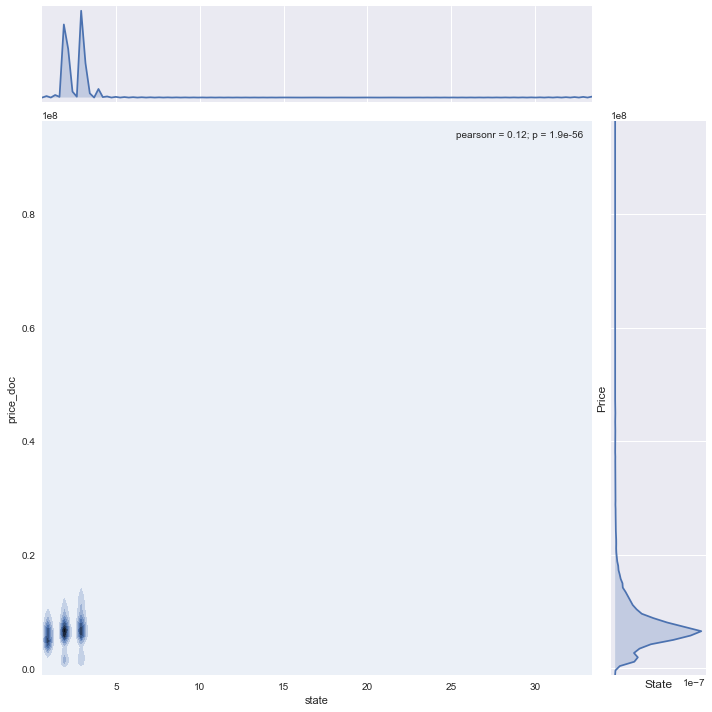

In [74]:
train_df.state.unique()
plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.state, y=train_df.price_doc, kind='kde', size=10)
plt.ylabel('Price', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.show()

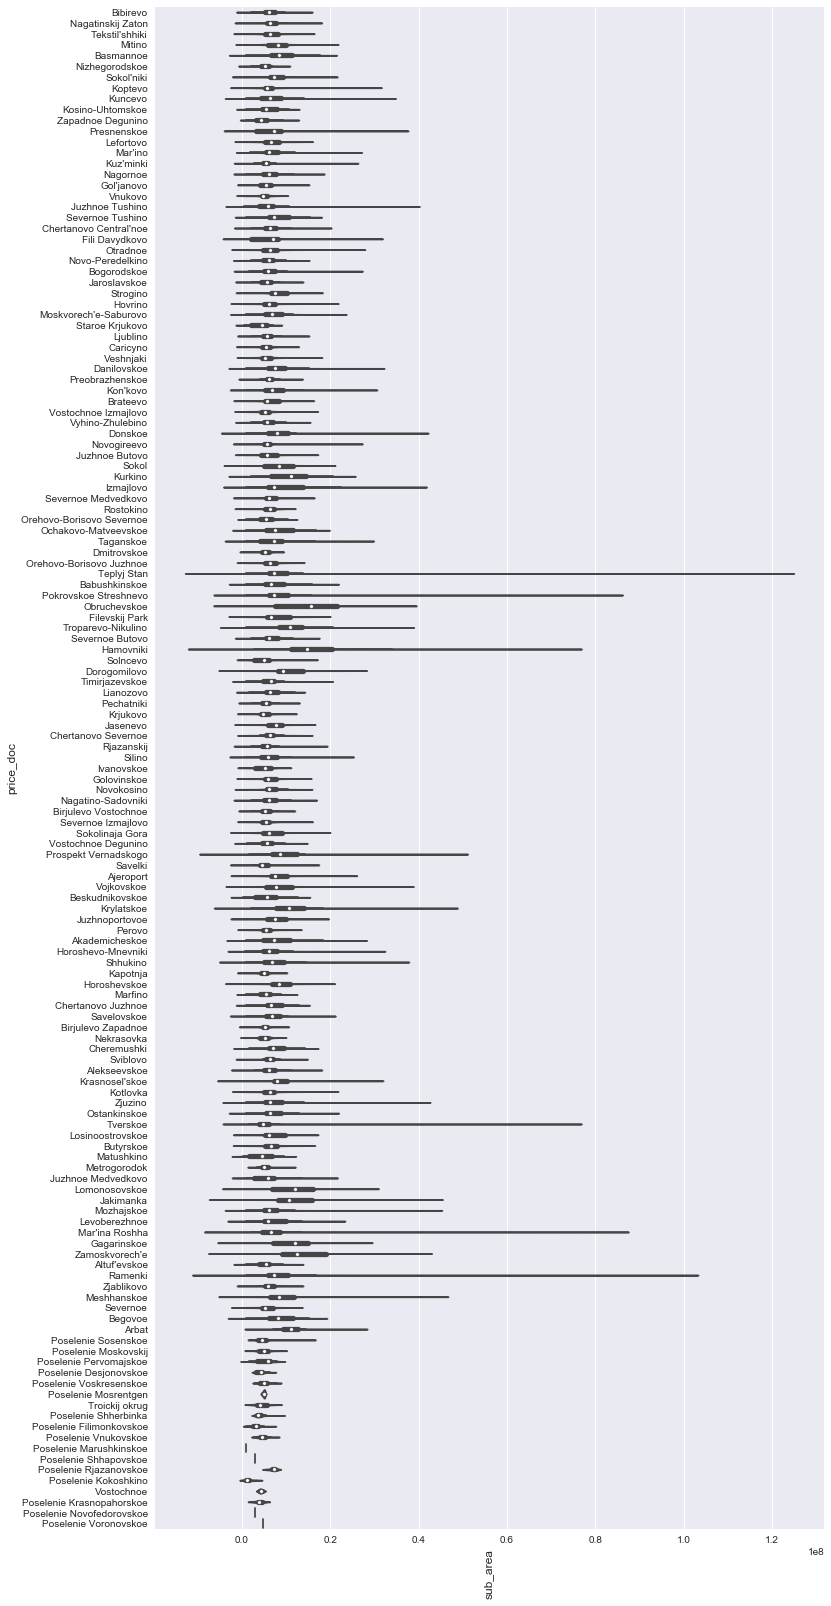

In [107]:
plt.figure(figsize=(12,28))
# sns.distplot(train_df[train_df['sub_area'] == 'Mitino'].price_doc.values, bins=50, kde=True)
sns.violinplot(y="sub_area", x="price_doc", data=train_df.ix[0:10000,["sub_area","price_doc"]])
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('sub_area', fontsize=12, rotation=90)
plt.show()

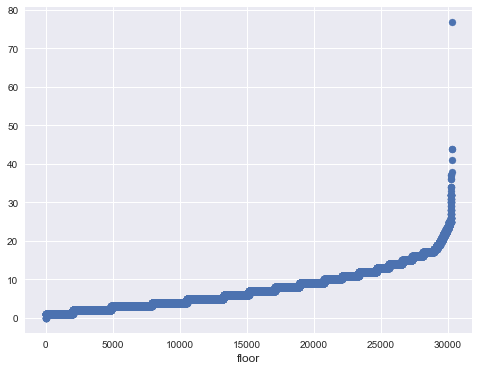

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['floor'].values))
plt.xlabel('floor', fontsize=12)
plt.show()

In [123]:
train_df.sub_area.unique().shape
train_df['floor'].values

array([  4.,   3.,   2., ...,  10.,   5.,   1.])

In [12]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,157
1,datetime64[ns],1
2,float64,119
3,object,15


In [18]:
dtype_df = train_df.dtypes

In [58]:
dtype_df.shape

(292,)

In [128]:
train_df.loc[:, train_df.dtypes == 'O']

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
5,Investment,Nizhegorodskoe,no,yes,no,no,yes,no,no,no,no,no,no,no,poor
6,Investment,Sokol'niki,no,no,no,no,no,no,no,no,yes,no,no,no,poor
7,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
8,Investment,Koptevo,no,no,no,no,no,no,no,no,no,no,no,no,poor
9,Investment,Kuncevo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [26]:
train_df.ecology.unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'], dtype=object)

In [67]:
train_dscp = train_df.describe()
column_count = train_dscp.loc["count",:].reset_index() 
column_count.columns = ["column_title", "Num"]
column_count["Num"] = column_count["Num"].astype(int)
column_count['num_null'] =column_count["Num"].apply(lambda x: (30471 - x))
column_count.ix[column_count['num_null']>6000, :]
# column_count.ix[column_count['num_null']>6000, :].column_title.values

,column_title,Num,num_null
2,life_sq,24088,6383
4,max_floor,20899,9572
5,material,20899,9572
6,build_year,16866,13605
7,num_room,20899,9572
8,kitch_sq,20899,9572
9,state,16912,13559
15,preschool_quota,23783,6688
18,school_quota,23786,6685
21,hospital_beds_raion,16030,14441


In [129]:
plt.figure(figsize=(6,4))
plt.scatter(range(column_count.shape[0]), np.sort(column_count['full_sq'].values))
plt.xlabel('null entry', fontsize=12)
plt.show()

KeyError: 'full_sq'

In [28]:
train_df.build_year.head(30)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: build_year, dtype: float64